<a href="https://colab.research.google.com/github/aksshiny/anil/blob/master/German_credit_data_IIMBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
churn_df = pd.read_csv( "/content/German Credit Data.csv" )

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [ ]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [ ]:

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_df[churn_df['TotalCharges'].isnull()]

KeyError: ignored

In [ ]:

churn_df.dropna(inplace=True)

In [ ]:
X_features = list( churn_df.columns )
X_features.remove( 'status' )

In [ ]:
encoded_churn_df = pd.get_dummies(churn_df[X_features], drop_first = True)
list(encoded_churn_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [ ]:
import statsmodels.api as sm
Y = churn_df.status
X = sm.add_constant( encoded_churn_df )

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

# **`Logistic Regression `**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:806: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.minimize(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


# **confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[195  14]
 [ 62  29]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       209
           1       0.67      0.32      0.43        91

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.63       300
weighted avg       0.73      0.75      0.71       300



# **DecisionTreeClassifier**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
## Configuring parameters and values for searched
tuned_parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [20, 30, 40, 50, 60, 80, 90, 100], 'min_samples_split': [1, 2, 3]}



dtree = GridSearchCV(DecisionTreeClassifier(),
tuned_parameters,
cv=10,
scoring='accuracy',n_jobs = -1, verbose = 2)


dtree.fit(X_train, y_train)
dtree.best_params_



Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got 

{'criterion': 'gini', 'max_depth': 80, 'min_samples_split': 3}

In [ ]:
y_pred = dtree.predict(X_test)
print('Accuracy of Decison Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decison Tree classifier on test set: 0.68


# **confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[166  43]
 [ 54  37]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       209
           1       0.46      0.41      0.43        91

    accuracy                           0.68       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.67      0.68      0.67       300



In [ ]:
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = {'max_depth': [70, 80, 90, 100, 110,120,130],    #10, 15, 20, 30
'n_estimators': [120, 130, 140, 150, 160, 170, 180],  #50, 70, 90, 100, 120, 160, 170, 180, 190, 200
#'min_samples_split': [2, 3, 4, 5],
#'min_samples_leaf': [1, 2, 3, 4, 5],
#'bootstrap': ['True', 'false'],
'max_features': ['sqrt', 'auto']}

In [ ]:
## Configuring search with the tunable parameters
from sklearn.model_selection import GridSearchCV
rnd_grid = GridSearchCV(RandomForestClassifier(),
tuned_parameters,
cv=10,
scoring='accuracy',n_jobs = -1, verbose = 2)

In [ ]:
rnd_grid.fit(X_train, y_train)
rnd_grid.best_params_

Fitting 10 folds for each of 98 candidates, totalling 980 fits


{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 130}

In [ ]:
y_pred = rnd_grid.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rnd_grid.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.76


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[193  16]
 [ 57  34]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       209
           1       0.68      0.37      0.48        91

    accuracy                           0.76       300
   macro avg       0.73      0.65      0.66       300
weighted avg       0.74      0.76      0.73       300



In [ ]:
importances = rnd_grid.best_estimator_.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

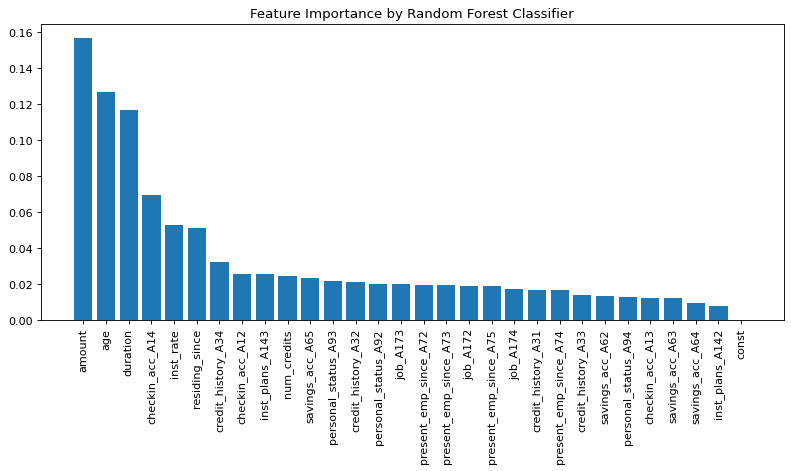

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.title('Feature Importance by Random Forest Classifier')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/German Credit Data.csv")

# Separate the features and target
X = df.drop("status", axis=1)
y = df["status"]




In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)


ValueError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/German Credit Data.csv")

In [9]:
df = pd.get_dummies(df, columns=df.columns[df.dtypes == 'object'])

In [10]:
X = df.drop("status", axis=1)
y = df["status"]

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [28]:
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
print(pd.Series(y_resampled).value_counts())

0    700
1    700
Name: status, dtype: int64


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/German Credit Data.csv")

# Encode the non-numeric columns using One-Hot Encoding
df = pd.get_dummies(df, columns=df.columns[df.dtypes == 'object'])

# Separate the features and status
X = df.drop("status", axis=1)
y = df["status"]

# Convert the status column to a pandas Series
y = pd.Series(y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)



In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [8]:
# Train the Random Forest classifier on the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [10]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8321428571428572
